In [2]:
#necessary imports
import cv2
import matplotlib.pyplot as plt
import numpy as np

Q1. Reading an image into an array and displaying it.

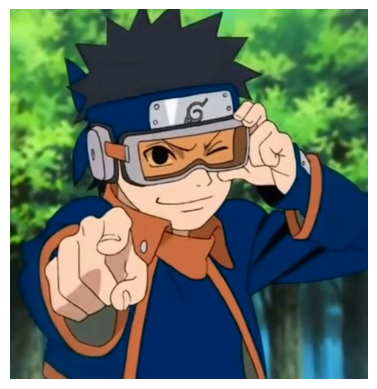

In [3]:
img=cv2.imread("images/obito.png")
#converting the image from B G R to R G B
img_converted=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_converted)
plt.axis('off')
plt.show()

Q2. Writing an image into an array

In [4]:
cv2.imwrite('images/output/Q2.png', img) #here we cant use img_converted

True

Q3. Changing Brightness of the Image

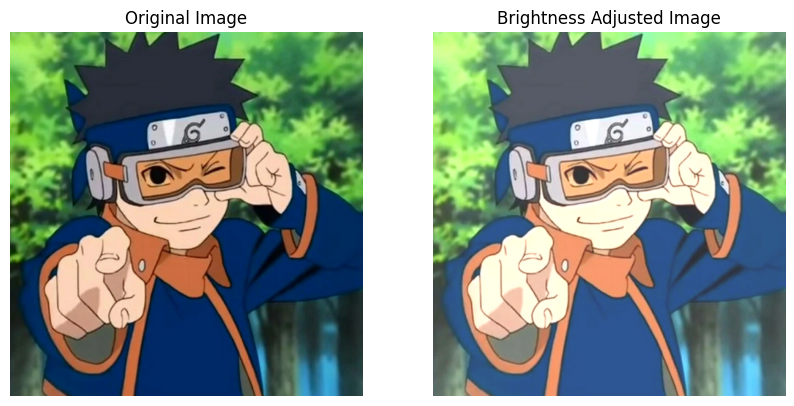

In [5]:
def change_brightness(image, brightness):
    if image is None:
        print("Could not open the image")
        exit()
    
    m, n, c = image.shape
    image_modified = np.zeros((m, n, c), dtype=int)
    for i in range(m):
        for j in range(n):
            for l in range(c):
                image_modified[i, j, l] = brightness + image[i, j, l]
    
    image_modified = np.clip(image_modified, 0, 255).astype(np.uint8)
    
    return image_modified
image = cv2.imread("images/obito.png")
brightness = 45
image_modified = change_brightness(image, brightness)
cv2.imwrite('images/output/Q3.png', image_modified)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_modified, cv2.COLOR_BGR2RGB))
plt.title('Brightness Adjusted Image')
plt.axis('off') 
plt.show()

Q4. Changing contrast of a given image

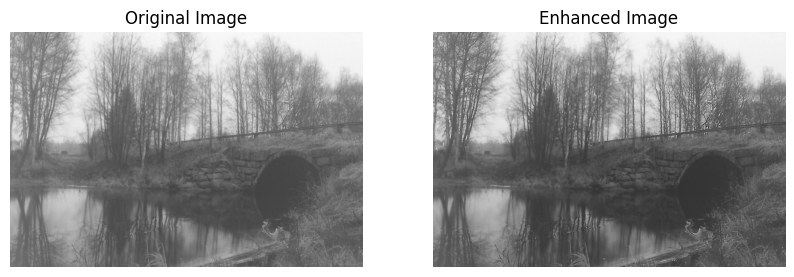

In [6]:
def enhance_image(image, gamma=0.8, amount=1.0, radius=5, threshold=0):
    img_float = image.astype(float) / 255.0
    img_gamma = np.power(img_float, gamma)
    blurred = cv2.GaussianBlur(img_gamma, (0, 0), radius)
    unsharp_mask = img_gamma - blurred
    img_enhanced = img_gamma + amount * unsharp_mask
    mask = np.abs(unsharp_mask) > threshold
    img_enhanced = np.where(mask, img_enhanced, img_gamma)
    return np.clip(img_enhanced * 255, 0, 255).astype(np.uint8)
image = cv2.imread("images/lowcontrast.png")
img2 = enhance_image(image, gamma=1.2, amount=1.5, radius=3, threshold=0.05)
cv2.imwrite('images/output/Q4_enhanced.png', img2)
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Enhanced Image')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

Q5. Converting an image to a greyscale image

(2960, 1440)


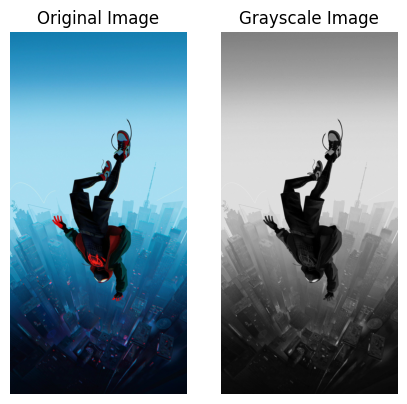

In [7]:
def greyscale(image):
    m, n, c = image.shape
    img2 = np.zeros((m, n), dtype=np.uint8) 
    for i in range(m):
        for j in range(n):
            r = image[i, j, 0]
            g = image[i, j, 1]
            b = image[i, j, 2]
            gray = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            img2[i, j] = gray
    
    return img2
image = cv2.imread("images/spiderman.png")
img2 = greyscale(image)
print(img2.shape)  
cv2.imwrite('images/output/Q5.png', img2)
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(img2, cmap='gray') 
plt.axis('off')

plt.show()
            

Q6. Converting a greyscale image to RGB image.

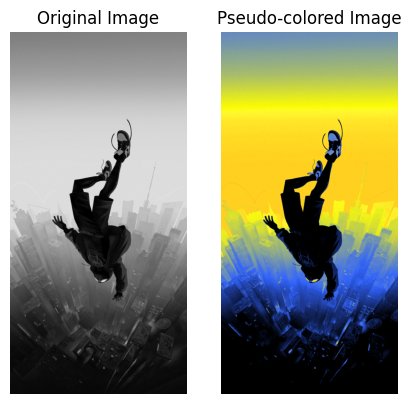

In [8]:
def pseudo_color_mapping(image):
    if image is None:
        print("Could not open the image")
        exit()
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = greyscale(image)
    m, n = image.shape
    color_image = np.zeros((m, n, 3), dtype=np.uint8) 
    for i in range(m):
        for j in range(n):
            intensity = image[i, j]
            if intensity <= 30:  # Very dark regions
                color_image[i, j] = [0, 0, 0]  # Black
            elif intensity <= 100:  # Dark to mid-tone regions
                factor = (intensity - 30) / 70.0  # Normalized factor for smooth transition
                blue = int(255 * factor)
                green = int(100 * factor)
                red = int(50 * factor)
                color_image[i, j] = [blue, green, red]
            elif intensity <= 200:  # Mid-tone to bright regions
                factor = (intensity - 100) / 100.0  # Normalized factor for smooth transition
                blue = int(255 * (1 - factor))
                green = int(100 + 155 * factor)
                red = int(50 + 205 * factor)
                color_image[i, j] = [blue, green, red]
            else:  # Very bright regions
                factor = (intensity - 200) / 55.0  # Normalized factor for smooth transition
                blue = int(50 * (1 - factor))
                green = int(255 * (1 - factor * 0.5))
                red = 255
                color_image[i, j] = [blue, green, red]

    return color_image

image = cv2.imread("images/output/Q5.png")
img2 = pseudo_color_mapping(image)
cv2.imwrite('images/output/Q6.png', img2)

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Pseudo-colored Image')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Q7. Green screen with a background

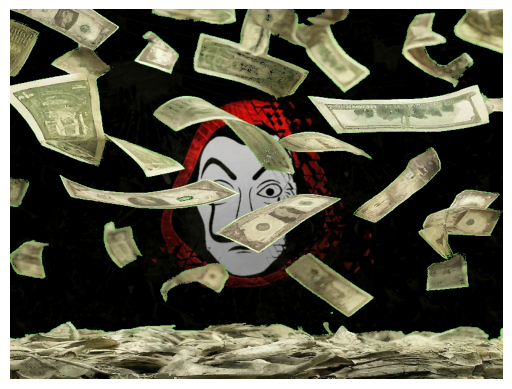

True

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_resize(image, new_width, new_height):
    old_height, old_width, channels = image.shape
    y_indices = (np.arange(new_height).reshape(-1, 1) * old_height / new_height).astype(np.float32)
    x_indices = (np.arange(new_width).reshape(1, -1) * old_width / new_width).astype(np.float32)
    y0, y1 = np.floor(y_indices).astype(int), np.ceil(y_indices).astype(int)
    x0, x1 = np.floor(x_indices).astype(int), np.ceil(x_indices).astype(int)
    y1 = np.clip(y1, 0, old_height - 1)
    x1 = np.clip(x1, 0, old_width - 1)
    dy, dx = y_indices - y0, x_indices - x0
    resized = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    for c in range(channels):
        top = (1 - dx) * image[y0, x0, c] + dx * image[y0, x1, c]
        bottom = (1 - dx) * image[y1, x0, c] + dx * image[y1, x1, c]
        resized[:, :, c] = ((1 - dy) * top + dy * bottom).astype(np.uint8)
    return resized

def replace_green_screen(green_screen_image, background_image, new_width, new_height, green_threshold=100):
    green_screen_resized = manual_resize(green_screen_image, new_width, new_height)
    background_resized = manual_resize(background_image, new_width, new_height)
    green_min = np.array([0, green_threshold, 0], dtype=np.uint8)
    green_max = np.array([100, 255, 100], dtype=np.uint8)
    green_mask = np.all((green_screen_resized >= green_min) & (green_screen_resized <= green_max), axis=-1)
    result_image = np.where(green_mask[:, :, np.newaxis], background_resized, green_screen_resized)
    return result_image
new_width = 800
new_height = 600
green_screen_image = cv2.imread('images/greenscreen.png')
background_image = cv2.imread('images/background.png')
result_image = replace_green_screen(green_screen_image, background_image, new_width, new_height)
image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
cv2.imwrite('images/output/Q7.png', result_image)


Q8. Reading a video file and converting it into an array of images

In [10]:
import cv2

def video_to_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return []
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    cv2.destroyAllWindows()
    return frames
def frames_to_video(frames, output_path, frame_rate=30):
    if not frames:
        print("No frames to write.")
        return
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
    out = cv2.VideoWriter(output_path, fourcc, frame_rate, (width, height))
    for frame in frames:
        out.write(frame)
    
    out.release()
    print(f"Video saved to {output_path}")
video_path = 'videos/video.mp4'
frames = video_to_frames(video_path)
print(f"Number of frames: {len(frames)}")
output_video_path = 'videos/output_video.mp4'
frames_to_video(frames, output_video_path)


: 

: 

Q9. Making a transition video

In [ ]:
def fade_transition(image1, image2, steps):
    frames = []
    for i in range(steps):
        alpha = i / (steps - 1)
        beta = 1 - alpha
        blended = np.clip(alpha * image2 + beta * image1, 0, 255).astype(np.uint8)
        frames.append(blended)
    return frames

# Load images
img1 = cv2.imread('images/transition_1.png')
img2 = cv2.imread('images/transition2.png')


new_width = min(img1.shape[1], img2.shape[1])
new_height = min(img1.shape[0], img2.shape[0])
image1_resized = manual_resize(img1, new_width, new_height)
image2_resized = manual_resize(img2, new_width, new_height)

fps = 30
duration = 1
steps = fps * duration
frames = fade_transition(image1_resized, image2_resized, steps)

height, width, layers = image1_resized.shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('videos/transition_video.mp4', fourcc, fps, (width, height))

for frame in frames:
    out.write(frame)

out.release()
cv2.destroyAllWindows()